# Using *N*-Dimensional Hypervolumes to Assess Ecosystem Stability

In [2]:
source("00_functions.R")

require(repr) # for ploting in jupyter
options(repr.plot.width=8, repr.plot.height=5)
set.seed(111)


 loading required packages



### read in data

In [3]:
# abundance
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
#trees_df = read.csv("../Results/trees_genus_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)


# presence/absence
#trees_df   = read.csv("../Results/trees_genus_matrix_PA.csv", row.names=1)
#mamls_df = read.csv("../Results/m_trap-year_PA.csv", row.names=1)
#btles_df = read.csv("../Results/btles_matrix_PA.csv", row.names=1)

###########################################################################

# time between censuses
trees_cen = read.csv("../Results/trees_census_dates.csv")
btles_cen = read.csv("../Results/btles_census_dates.csv")
mamls_cen = read.csv("../Results/mamls_years_dates.csv")

### pca on all subplot_census by species matrix

In [4]:
scale = F

trees_pca = do_pca(trees_df, scale = scale, plot = F)
mamls_pca = do_pca(mamls_df, scale = scale, plot = F)
btles_pca = do_pca(btles_df, scale = scale, plot = F)

cat("Explained Varience Trees (first 3 PCs):", sum(trees_pca@exp.var[0:3])*100)
trees_pca@exp.var[0:5]
cat("Explained Varience Mammals (first 3 PCs):", sum(mamls_pca@exp.var[0:3])*100)
mamls_pca@exp.var[0:5]
cat("Explained Varience Beetles: (first 3 PCs)", sum(btles_pca@exp.var[0:3])*100)
btles_pca@exp.var[0:5]

Explained Varience Trees (first 3 PCs): 38.97859 %

PC1        PC2        PC3        PC4        PC5 
0.28888702 0.05652327 0.04437558 0.03745280 0.03157997

Explained Varience Mammals (first 3 PCs): 61.81098

PC1        PC2        PC3        PC4        PC5 
0.26440642 0.24031383 0.11338956 0.08206127 0.06262138

Explained Varience Beetles: (first 3 PCs) 97.79215

PC1         PC2         PC3         PC4         PC5 
0.883287689 0.075902799 0.018730990 0.006344010 0.004274941

##### Could use Nonmetric Multidimensional Scaling
Commented out because its really slow

In [4]:
#trees_mds = metaMDS(trees_df, k = 3)
#btles_mds = metaMDS(btles_df, k = 3)
#mamls_mds = metaMDS(mamls_df[rowSums(mamls_df) > 0, ], k = 3)

#trees_mds_out = add_cols(as.data.frame(trees_mds$points))
#mamls_mds_out = add_cols(as.data.frame(mamls_mds$points))
#btles_mds_out = add_cols(as.data.frame(btles_mds$points))

##### Came accross ZIFA but didn't have time to understand it

In [5]:
#trees_zifa = read.csv("../Results/trees_zifa.csv", row.names = 1)
#mamls_zifa = read.csv("../Results/mamls_zifa.csv", row.names = 1)
#btles_zifa = read.csv("../Results/btles_zifa.csv", row.names = 1)

#trees_zifa = add_cols(trees_zifa)
#mamls_zifa = add_cols(mamls_zifa)
#btles_zifa = add_cols(btles_zifa)

### construct hyervolumes

#### from pca

In [6]:
trees_hvs_p = hvs_rslts(trees_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", trees_cen, method = "gaussian")
mamls_hvs_p = hvs_rslts(mamls_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", mamls_cen, method = "gaussian")
btles_hvs_p = hvs_rslts(btles_pca@axis, axis = c("PC1", "PC2", "PC3"), "seq", btles_cen, method = "gaussian")

# cat("\n\n")
# cat("Trees: ",   sum(is.na(hvs.rslts_trees@rslts$centroid_PC1))/nrow(hvs.rslts_trees@rslts), "\n")
# cat("Mammals: ", sum(is.na(hvs.rslts_mammals@rslts$centroid_PC1))/nrow(hvs.rslts_mammals@rslts), "\n")
# cat("Beetles: ", sum(is.na(hvs.rslts_beetles@rslts$centroid_PC1))/nrow(hvs.rslts_beetles@rslts))

#### from nmds

In [ ]:
#trees_hvs = hvs_rslts(trees_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", trees_cen, method = "gaussian")
#mamls_hvs = hvs_rslts(mamls_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", mamls_cen, method = "gaussian")
#btles_hvs = hvs_rslts(btles_mds_out, axis = c("MDS1", "MDS2", "MDS3"), "seq", btles_cen, method = "gaussian")

#### from ZIFA

In [ ]:
#trees_hvs_z = hvs_rslts(trees_zifa, axis = c("Z1", "Z2", "Z3"), "seq", trees_cen, method = "gaussian")
#mamls_hvs_z = hvs_rslts(mamls_zifa, axis = c("Z1", "Z2", "Z3"), "seq", mamls_cen, method = "gaussian")
#btles_hvs_z = hvs_rslts(btles_zifa, axis = c("Z1", "Z2", "Z3"), "seq", btles_cen, method = "gaussian")

### plot hypervolumes

In [6]:
plot_hvs(btles_hvs_p, "D")

ERROR: Error in strsplit(names(hvs.rslts@hvlist), "_"): object 'btles_hvs_p' not found


### compare hypervolumes

In [ ]:
kind = "pca"  # "zifa"

In [ ]:
# set up dataframe for plotting
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

if(kind == "pca"){
    btles = btles_hvs_p@compare
    trees = trees_hvs_p@compare
    mamls = mamls_hvs_p@compare
    } else if (kind == "zifa"){
    btles = btles_hvs_z@compare
    trees = trees_hvs_z@compare
    mamls = mamls_hvs_z@compare
    } else {cat("kind not defined")}

    
btles$taxa = "Beetles"
colnames(btles_agb) = c("plot", "agb")
btles = merge(btles, btles_agb, by = "plot")

trees$taxa = "Trees"
colnames(trees_agb) = c("plot", "agb")
trees = merge(trees, trees_agb, by = "plot")

mamls$taxa = "Mammals"
colnames(mamls_agb) = c("plot", "agb")
mamls = merge(mamls, mamls_agb, by = "plot")

ovlp = rbind(trees, btles, mamls)
ovlp = ovlp[complete.cases(ovlp), ]
ovlp$taxa = as.factor(ovlp$taxa)

ovlp$agb = ovlp$agb*16
ovlp$logagb = log(ovlp$agb)

In [ ]:
# boxplot
plt = ggplot(data = ovlp, aes(x = taxa, y = overlap, color = taxa, shape = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

In [ ]:
fit = aov(overlap ~ taxa, data = ovlp)
summary(fit)
TukeyHSD(fit)

In [ ]:
# overlap by agb
plt = ggplot(data = ovlp, aes(x = agb, y = overlap, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
#print(plt)

In [ ]:
# overlap by log(agb)
plt = ggplot(data = ovlp, aes(x = logagb, y = overlap, color = taxa, shape = taxa))
plt = plt + geom_point()
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle(kind)
print(plt)

In [130]:
# model
model = aov(overlap ~ logagb*taxa, data = ovlp)
summary(model)
#plot(model)

            Df Sum Sq Mean Sq F value Pr(>F)    
logagb       1  0.049  0.0492   3.043 0.0865 .  
taxa         2  5.026  2.5128 155.439 <2e-16 ***
logagb:taxa  2  0.066  0.0332   2.053 0.1377    
Residuals   57  0.921  0.0162                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [126]:
trees_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Trees"))
mamls_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Mammals"))
btles_mdl = lm(overlap ~ logagb, data = subset(ovlp, taxa == "Beetles"))

In [128]:
summary(trees_mdl)


Call:
lm(formula = overlap ~ logagb, data = subset(ovlp, taxa == "Trees"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32610 -0.03454  0.03850  0.07803  0.18200 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.50796    0.14426   3.521  0.00228 **
logagb       0.06218    0.03293   1.888  0.07439 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1208 on 19 degrees of freedom
Multiple R-squared:  0.158,	Adjusted R-squared:  0.1137 
F-statistic: 3.565 on 1 and 19 DF,  p-value: 0.07439


## Spatial/Temporal Stabiltiy

In [7]:
# readin and sort data
trees_df = read.csv("../Results/trees_matrix.csv", row.names=1)
mamls_df = read.csv("../Results/m_trap-year.csv", row.names=1)
btles_df = read.csv("../Results/btles_matrix.csv", row.names=1)

trees_df = add_cols(trees_df)
mamls_df = add_cols(mamls_df)
btles_df = add_cols(btles_df)

trees = melt(trees_df, id.vars=c("plot", "subplot", "census"))
mamls = melt(mamls_df, id.vars=c("plot", "subplot", "census"))
btles = melt(btles_df, id.vars=c("plot", "subplot", "census"))

In [8]:
# calculate spatial stability
trees_stb = spatial_stability(trees)
mamls_stb = spatial_stability(mamls)
btles_stb = spatial_stability(btles)

trees_stb$taxa = "Trees"
mamls_stb$taxa = "Mammals"
btles_stb$taxa = "Beetles"

trees_stb$plot = unlist(strsplit(trees_stb$census, "_"))[ c(T,F)]
mamls_stb$plot = unlist(strsplit(mamls_stb$census, "_"))[ c(T,F)]
btles_stb$plot = unlist(strsplit(btles_stb$census, "_"))[ c(T,F)]

In [91]:
trees_tstb = temporal_stability(trees)
mamls_tstb = temporal_stability(mamls)
btles_tstb = temporal_stability(btles)

trees_tstb$taxa = "Trees"
mamls_tstb$taxa = "Mammals"
btles_tstb$taxa = "Beetles"

In [92]:
 #merge with agb
trees_agb = read.csv("../Results/trees_agb.csv")
btles_agb = read.csv("../Results/btles_agb.csv")
mamls_agb = read.csv("../Results/mamls_agb.csv")

colnames(trees_agb) = c("plot", "agb")
colnames(mamls_agb) = c("plot", "agb")
colnames(btles_agb) = c("plot", "agb")

trees_stb = merge(trees_stb, trees_agb, by = "plot")
mamls_stb = merge(mamls_stb, mamls_agb, by = "plot")
btles_stb = merge(btles_stb, btles_agb, by = "plot")

trees_tstb = merge(trees_tstb, trees_agb, by = "plot")
mamls_tstb = merge(mamls_tstb, mamls_agb, by = "plot")
btles_tstb = merge(btles_tstb, btles_agb, by = "plot")

In [25]:
# setup dataframe for plotting
stab = rbind(trees_stb, btles_stb, mamls_stb)
stab = stab[complete.cases(stab), ]
stab$taxa = as.factor(stab$taxa)

stab$agb = stab$agb*16
stab$logagb = log(stab$agb)

In [141]:
# setup dataframe for plotting
stab = rbind(trees_tstb, btles_tstb, mamls_tstb)
stab = stab[complete.cases(stab), ]
stab$taxa = as.factor(stab$taxa)

stab$agb = stab$agb*16
stab$logagb = log(stab$agb)
stab$stability = log(stab$stability)

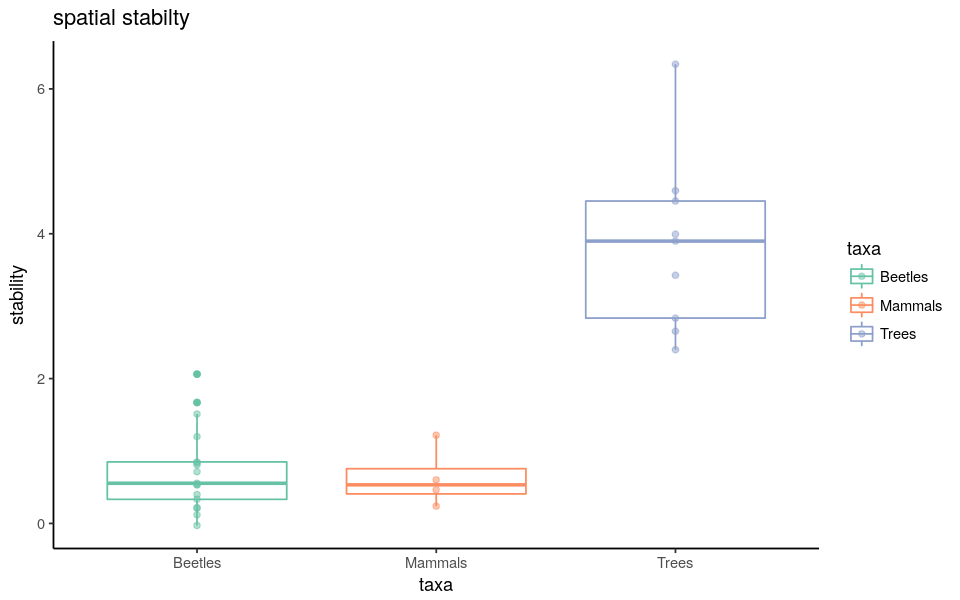

In [142]:
# boxplot
plt = ggplot(data = stab, aes(x = taxa, y = stability, color = taxa))
plt = plt + geom_boxplot()
plt = plt + geom_point(alpha = 0.5)
plt = plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stabilty")
print(plt)

In [166]:
fit = aov(stability ~ taxa, data = stab)
summary(fit)
TukeyHSD(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
taxa         2  61.64  30.820   46.79 1.68e-09 ***
Residuals   27  17.79   0.659                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = stability ~ taxa, data = stab)

$taxa
                      diff       lwr      upr     p adj
Mammals-Beetles -0.1062388 -1.224541 1.012064 0.9699119
Trees-Beetles    3.1068039  2.277249 3.936359 0.0000000
Trees-Mammals    3.2130426  2.003769 4.422316 0.0000013


In [143]:
# stability by agb
plt = ggplot(data = stab, aes(x = agb, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
#print(plt)

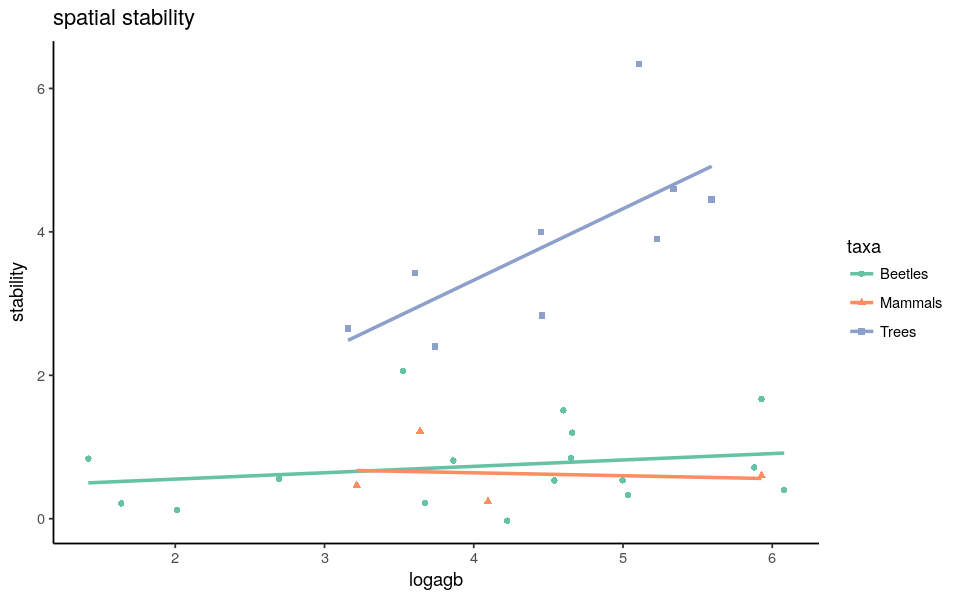

In [144]:
# stabiluty by log(agb)
plt = ggplot(data = stab, aes(x = logagb, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point() 
plt = plt + geom_smooth(method = 'lm', se = F)
plt = plt + scale_color_brewer(palette = "Set2")
plt = plt + theme_classic()
plt = plt + ggtitle("spatial stability")
print(plt)

In [167]:
# model
model = aov(stability ~ logagb*taxa, data = stab)
summary(model)

trees_mdl = lm(stability ~ logagb, data = subset(stab, taxa == "Trees"))
mamls_mdl = lm(stability ~ logagb, data = subset(stab, taxa == "Mammals"))
btles_mdl = lm(stability ~ logagb, data = subset(stab, taxa == "Beetles"))

            Df Sum Sq Mean Sq F value   Pr(>F)    
logagb       1   6.31   6.306  13.063  0.00139 ** 
taxa         2  57.09  28.545  59.133 5.31e-10 ***
logagb:taxa  2   4.45   2.223   4.605  0.02030 *  
Residuals   24  11.59   0.483                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [165]:
summary(trees_mdl)


Call:
lm(formula = stability ~ logagb, data = subset(stab, taxa == 
    "Trees"))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94582 -0.64936 -0.06509  0.21871  1.91303 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.6587     1.7343  -0.380   0.7154  
logagb        0.9962     0.3776   2.638   0.0335 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.923 on 7 degrees of freedom
Multiple R-squared:  0.4986,	Adjusted R-squared:  0.4269 
F-statistic:  6.96 on 1 and 7 DF,  p-value: 0.03351


## hypervolumes vs spatial stabiltiy

In [106]:
a = ovlp %>% 
    group_by(plot, taxa) %>% summarise(overlap = mean(overlap))

b = stab %>% 
    group_by(plot, taxa) %>% summarise(stability = mean(stability))

c = merge(a, b, by = c("plot", "taxa"))

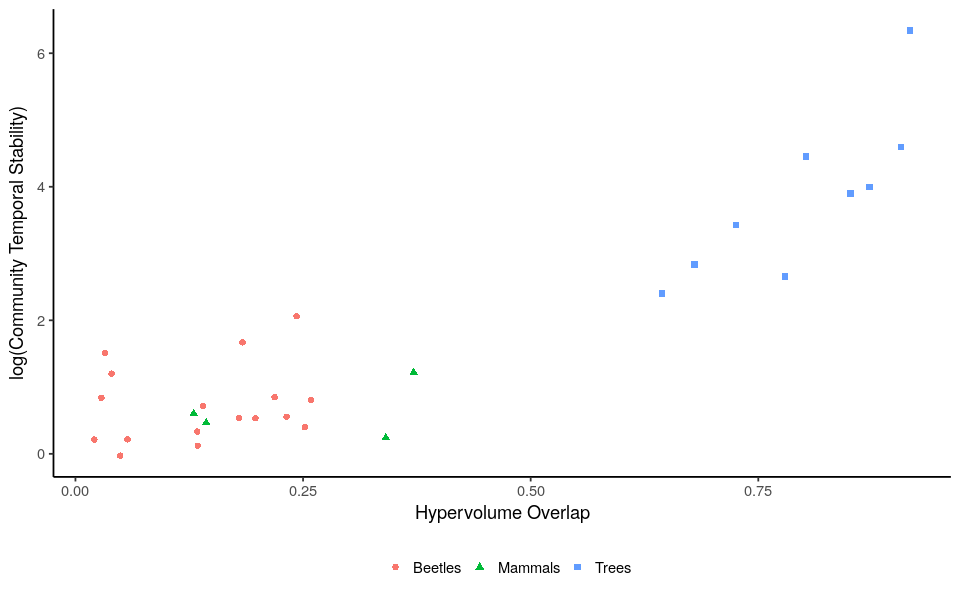

In [146]:
plt = ggplot(data = c, aes(x = overlap, y = stability, color = taxa, shape = taxa))
plt = plt + geom_point()
plt = plt + theme_classic()
plt = plt + xlab("Hypervolume Overlap") + ylab("log(Community Temporal Stability)")
plt = plt + theme(legend.title = element_blank(), legend.position = "bottom")
#plt = plt + geom_smooth(method = 'lm')
print(plt)

In [151]:
cor.test(c$overlap, c$stability)


	Pearson's product-moment correlation

data:  c$overlap and c$stability
t = 10.93, df = 28, p-value = 1.306e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7988229 0.9517216
sample estimates:
      cor 
0.9000621 


In [152]:
d = subset(c, taxa == "Trees")

In [153]:
cor.test(d$overlap, d$stability)


	Pearson's product-moment correlation

data:  d$overlap and d$stability
t = 3.8153, df = 7, p-value = 0.006583
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3469945 0.9612670
sample estimates:
      cor 
0.8217474 
